We are going to compare 4 classifiers of decision trees (DecisionTreeClassifier, AdaBoostClassifier, BoostingClassifier, RandomForestClassifier) and make their parameters vary to understand how each one of them works and how they can change their predictive strength.

For this assignment, I decided to make the parameters vary by giving the user the possibility to change the parameters in addition to giving the "best" and "worst" parameters. MNIST dataset was used, and the best models were used with Fashion MNIST which is another classification dataset.


First step is loading the dataset.

This is the final version of the assignment. Here is what was improved from the first version:

1. Shorter code by using a reusable functions.
2. I removed the bugs and the code works well
3. Improved plots
4. Completed fmnist part
5. Did the conclusion



In [ ]:
from keras.datasets import mnist # importing the dataset
from matplotlib import pyplot # library for plotting

In [ ]:
(trainX, trainy), (testX, testy) = mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


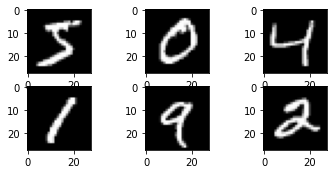

In [ ]:
# Plotting 6 elements from MNIST dataset
for i in range(6):
 pyplot.subplot(330 + 1 + i)
 pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

In [ ]:
# Reshaping as vectors
trainX = trainX.reshape(-1, 784)
testX = testX.reshape(-1, 784)

In [ ]:
# Creating a list with the labels for the plot of the confusion matrix
set_res = set(testy) 
labels = (list(set_res))

In [ ]:
# Importing the libraries
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import time

-------
**DECISION TREE CLASSIFIER**

The varying parameter is the maximum depth of the tree so we will change the parameter max_depth in DecisionTreeClassifier(). Leaving it empty means the tree will be extended until we obtain a pure node.

We will create a function pred_model that will do all the plots and that will be reused for each model.

In [ ]:
def pred_model(model):
  global prediction_train
  global prediction
  global training_time
  global inference_time

# Fitting the model
  start = time.time()
  model.fit(trainX, trainy)
  stop = time.time()

# Predictions on the training set
  prediction_train = model.predict(trainX)

# Predictions on the testing set
  start1 = time.time()
  prediction = model.predict(testX)
  stop1 = time.time()

  training_time = f"{stop - start}"
  inference_time = f"{stop1 - start1}"
  print("Training accuracy: ", accuracy_score(trainy, prediction_train))
  print("Testing accuracy: ", accuracy_score(testy, prediction))
  print(f"Training time: {stop - start}s")
  print(f"Inference time: {stop1 - start1}s \n\n")

In [ ]:
def dtc_model(max_depth):
  model_dtc = tree.DecisionTreeClassifier(max_depth=int(max_depth))
  pred_model(model_dtc)

Maximum depth:  2
Training accuracy:  0.34181666666666666
Testing accuracy:  0.3447
Training time: 2.5634186267852783s
Inference time: 0.01323246955871582s 


Maximum depth:  5
Training accuracy:  0.6722666666666667
Testing accuracy:  0.6747
Training time: 6.01244592666626s
Inference time: 0.01402425765991211s 


Maximum depth:  10
Training accuracy:  0.8995166666666666
Testing accuracy:  0.867
Training time: 10.966827630996704s
Inference time: 0.01851177215576172s 


Maximum depth:  20
Training accuracy:  0.9950333333333333
Testing accuracy:  0.8781
Training time: 17.1959707736969s
Inference time: 0.015822649002075195s 




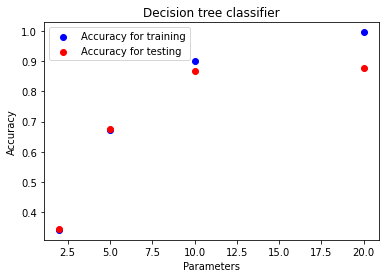

In [ ]:
max_depth_table=[2,5,10,20]

acc_testing = []
acc_training = []
training_time_dtc=[]
inference_time_dtc=[]

for i in max_depth_table:
  print("Maximum depth: ",i)
  dtc_model(i)
  acc_training.append(accuracy_score(trainy, prediction_train))
  acc_testing.append(accuracy_score(testy, prediction))
  training_time_dtc.append(float(training_time))
  inference_time_dtc.append(float(inference_time))

plt.scatter(max_depth_table, acc_training, color='blue', label='Accuracy for training')
plt.scatter(max_depth_table, acc_testing, color='red', label='Accuracy for testing')
plt.title('Decision tree classifier')
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Same as before, we create GoodBadModel to plot the confusion matrices for both classifiers

In [ ]:
def GoodBadModel(good_model, bad_model):
  # Fitting the model
  bad_model.fit(trainX, trainy)
  good_model.fit(trainX, trainy)

  # Confusion matrix plot
  titles = [("Confusion matrix", 'true')]
  for title, normalize in titles:
    disp = plot_confusion_matrix(bad_model, testX, testy,
                                 display_labels=labels)
    disp.ax_.set_title(title)

  plt.show()

  titles = [("Confusion matrix", 'true')]
  for title, normalize in titles:
     disp = plot_confusion_matrix(good_model, testX, testy,
                                 display_labels=labels)
     disp.ax_.set_title(title)

  plt.show()

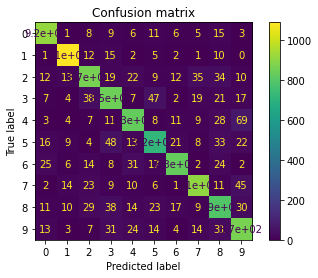

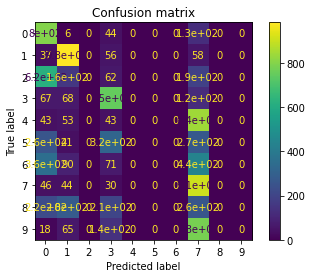

In [ ]:
# CONFUSION MATRIX FOR A GOOD AND A BAD CLASSIFIER
bad_model_dtc = tree.DecisionTreeClassifier(max_depth=2)
good_model_dtc = tree.DecisionTreeClassifier(max_depth=10)
GoodBadModel(bad_model_dtc, good_model_dtc)


First thing we notice is that even with a undertrained model we can see it predicts the 1 and 7 labels the easiest. Strangely, it even predicts them even better than the good model. That may be explained because they are easy to detect since they have a simpler shape than the other numbers (no curves or curls).

Second thing we can notice is about the training accuracy. The training accuracy is the model trained on itself, which is supposed to give us an accuracy that is very close to 1. If we limit the depth at 2, the training accuracy is still very low (0.34) because it did not finish to train properly. With a maximum depth of 20, we obtain 0.9983 and expect it to go up to 1 at some point. This happens with max_depth=100, were we can say that it definitely and quickly reached a point of overfitting.

The test accuracy is the accuracy we are looking to improve for our model. It  gives us an estimation of the accuracy if we decide to use this Decision Tree Classifier on a new dataset of written digits. Here, with a maximum depth of 20, we get a relatively good accuracy of 87%. This does not increase even if we let the maximum depth be very large (100) and let it overfit. This is probably due to the fact that the tree size had already been extended at maximum in size at max_depth=20.

---------
**ADABOOST CLASSIFIER**

The varying parameters for AdaBoostClassifier are the maximum depth and the number of estimators.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def abc_model (max_depth, estimators):
  model = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=int(max_depth)), n_estimators=int(estimators))
  pred_model(model)

Maximum depth:  2
Nb estimators:  2
Training accuracy:  0.4670166666666667
Testing accuracy:  0.4696
Training time: 5.469540119171143s
Inference time: 0.033926963806152344s 


Maximum depth:  2
Nb estimators:  5
Training accuracy:  0.6371666666666667
Testing accuracy:  0.6329
Training time: 13.589199542999268s
Inference time: 0.08379483222961426s 


Maximum depth:  2
Nb estimators:  10
Training accuracy:  0.7075333333333333
Testing accuracy:  0.7123
Training time: 27.206890106201172s
Inference time: 0.16768956184387207s 


Maximum depth:  5
Nb estimators:  2
Training accuracy:  0.7708333333333334
Testing accuracy:  0.7656
Training time: 12.445774793624878s
Inference time: 0.03539276123046875s 


Maximum depth:  5
Nb estimators:  5
Training accuracy:  0.8230833333333333
Testing accuracy:  0.8152
Training time: 31.361660718917847s
Inference time: 0.0874948501586914s 


Maximum depth:  5
Nb estimators:  10
Training accuracy:  0.8375
Testing accuracy:  0.8305
Training time: 62.725705146789

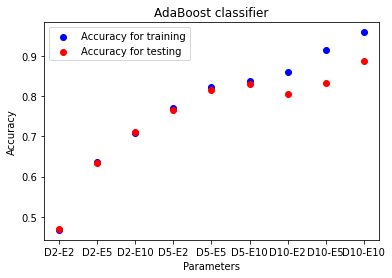

In [ ]:
max_depth_table = [2,5,10]
estimators_table = [2,5,10]

#Axis that will contain all values of the tables
axis_table=[]
it=''
for i in range(len(max_depth_table)):
  for j in range(len(estimators_table)):
    it="D"+str(max_depth_table[i])+"-E"+str(estimators_table[j])
    axis_table.append(it)

#Applying the model
acc_testing = []
acc_training = []
training_time_abc=[]
inference_time_abc=[]

for i in max_depth_table:
  for j in estimators_table:
    print("Maximum depth: ",i)
    print("Nb estimators: ",j)
    abc_model(i,j)
    acc_training.append(accuracy_score(trainy, prediction_train))  
    acc_testing.append(accuracy_score(testy, prediction))
    training_time_abc.append(float(training_time))
    inference_time_abc.append(float(inference_time))

plt.scatter(axis_table, acc_training, color='blue', label='Accuracy for training')
plt.scatter(axis_table, acc_testing, color='red', label='Accuracy for testing')
plt.title('AdaBoost classifier')
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- D: maximum depth
- E: nb of estimators

This plot strangely shows a decrease when the depth is too high, probably because we are going into overtraining.

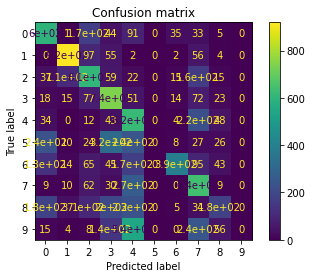

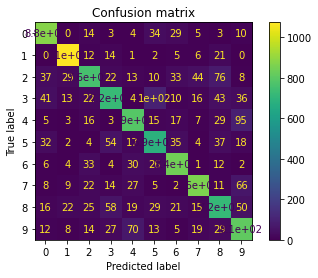

In [ ]:
# CONFUSION MATRIX FOR A GOOD AND A BAD CLASSIFIER
bad_model_abc = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2), n_estimators=2)
good_model_abc = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=5), n_estimators=5)
GoodBadModel(good_model_abc, bad_model_abc)


For this classifier, the worst classifier recognizes better the 0 and 1 labels (better than the best classifier). Previously, the DecisionTreeClassifier was more sensitive to lines even undertrained, while this model seems to like the simple shapes while being undertrained (such as one line or one circle).

When it comes to parameters, making the number of estimators higher (10) and keeping the maximum depth average (5) makes the model better at predicting than having a higher maximum depth, without going into overfitting. The accuracy goes to 83% with this setup. 

In addition to that, AdaBoost seems to overfit less than others models (an opposite example would be DecisionTreeClassifier). We can drastically increase the size of the parameters and the training accuracy would barely increase.
The AdaBoost is also more time consuming than the other models that we tested in this assignment, the training time increases significantly for little change in testing accuracy.


-----
**BAGGING CLASSIFIER**

The varying parameters for the Bagging Classifier are the maximum depth and the number of estimators.

In [ ]:
from sklearn.ensemble import BaggingClassifier

def bc_model (max_depth, estimators):
  model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth= int(max_depth)), n_estimators= int(estimators))
  pred_model(model)

Maximum depth:  2
Nb estimators:  2
Training accuracy:  0.38986666666666664
Testing accuracy:  0.3965
Training time: 2.766629934310913s
Inference time: 0.04350876808166504s 


Maximum depth:  2
Nb estimators:  5
Training accuracy:  0.402
Testing accuracy:  0.4088
Training time: 6.767194032669067s
Inference time: 0.10726761817932129s 


Maximum depth:  2
Nb estimators:  10
Training accuracy:  0.4109
Testing accuracy:  0.4155
Training time: 13.543343305587769s
Inference time: 0.22252893447875977s 


Maximum depth:  5
Nb estimators:  2
Training accuracy:  0.695
Testing accuracy:  0.7022
Training time: 6.662388324737549s
Inference time: 0.0444791316986084s 


Maximum depth:  5
Nb estimators:  5
Training accuracy:  0.7134166666666667
Testing accuracy:  0.7306
Training time: 16.529712200164795s
Inference time: 0.11083745956420898s 


Maximum depth:  5
Nb estimators:  10
Training accuracy:  0.7761
Testing accuracy:  0.7821
Training time: 33.078531980514526s
Inference time: 0.21628952026367188

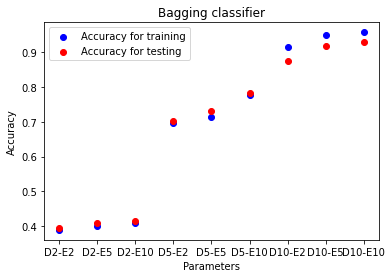

In [ ]:
max_depth_table = [2,5,10]
estimators_table = [2,5,10]

axis_table=[]
it=''
for i in range(len(max_depth_table)):
  for j in range(len(estimators_table)):
    it="D"+str(max_depth_table[i])+"-E"+str(estimators_table[j])
    axis_table.append(it)

acc_testing = []
acc_training = []
training_time_bc=[]
inference_time_bc=[]

for i in max_depth_table:
  for j in estimators_table:
    print("Maximum depth: ",i)
    print("Nb estimators: ",j)
    bc_model(i,j)
    acc_training.append(accuracy_score(trainy, prediction_train))  
    acc_testing.append(accuracy_score(testy, prediction))
    training_time_bc.append(float(training_time))
    inference_time_bc.append(float(inference_time))

plt.scatter(axis_table, acc_training, color='blue', label='Accuracy for training')
plt.scatter(axis_table, acc_testing, color='red', label='Accuracy for testing')
plt.title('Bagging classifier')
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- D: maximum depth
- E: nb of estimators

By looking at this plot, the maximum depth seems to have more of an impact than the number of estimators for the Bagging Classifier. We can compare this with the confusion matrix of the model D5-E10 and D10-E5.

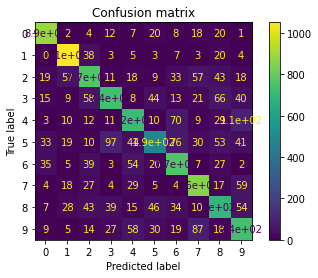

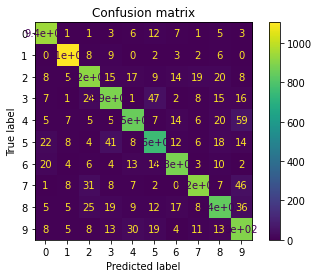

In [ ]:
# CONFUSION MATRIX FOR A GOOD AND A BAD CLASSIFIER
bad_model_bc = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=5), n_estimators=10)
good_model_bc = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=10), n_estimators=5)
GoodBadModel(good_model_bc, bad_model_bc)

I tried to compare the parameters of the previous classifier and got very 
Very good results for the Bagging classifier, with 92% accuracy
About half the waiting time of the AdaBoost with a much higher accuracy. The training accuracy takes time to reach 1, which is a good thing since we don't want overfitting to occur.

------
**RANDOM FOREST CLASSIFIER**

The varying parameters for Random Forest Classifier are the maximum depth and the number of trees in the forest (estimators).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def rfc_model(max_depth,estimators):
  model = RandomForestClassifier(n_estimators=int(estimators), max_depth=int(max_depth))
  pred_model(model)

Maximum depth:  2
Nb estimators:  2
Training accuracy:  0.43925
Testing accuracy:  0.4475
Training time: 0.22646474838256836s
Inference time: 0.015964984893798828s 


Maximum depth:  2
Nb estimators:  5
Training accuracy:  0.4966833333333333
Testing accuracy:  0.5111
Training time: 0.4515979290008545s
Inference time: 0.02070450782775879s 


Maximum depth:  2
Nb estimators:  10
Training accuracy:  0.48506666666666665
Testing accuracy:  0.494
Training time: 0.81197190284729s
Inference time: 0.025371551513671875s 


Maximum depth:  5
Nb estimators:  2
Training accuracy:  0.6647166666666666
Testing accuracy:  0.6733
Training time: 0.4024980068206787s
Inference time: 0.01742696762084961s 


Maximum depth:  5
Nb estimators:  5
Training accuracy:  0.7635333333333333
Testing accuracy:  0.7672
Training time: 0.8752009868621826s
Inference time: 0.0258634090423584s 


Maximum depth:  5
Nb estimators:  10
Training accuracy:  0.81805
Testing accuracy:  0.8254
Training time: 1.7116973400115967s
Infe

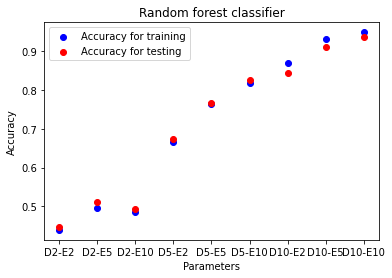

In [ ]:
max_depth_table = [2,5,10]
estimators_table = [2,5,10]

axis_table=[]
it=''
for i in range(len(max_depth_table)):
  for j in range(len(estimators_table)):
    it="D"+str(max_depth_table[i])+"-E"+str(estimators_table[j])
    axis_table.append(it)

acc_testing = []
acc_training = []
training_time_rfc=[]
inference_time_rfc=[]

for i in max_depth_table:
  for j in estimators_table:
    print("Maximum depth: ",i)
    print("Nb estimators: ",j)
    rfc_model(i,j)
    acc_training.append(accuracy_score(trainy, prediction_train))  
    acc_testing.append(accuracy_score(testy, prediction))
    training_time_rfc.append(float(training_time))
    inference_time_rfc.append(float(inference_time))

plt.scatter(axis_table, acc_training, color='blue', label='Accuracy for training')
plt.scatter(axis_table, acc_testing, color='red', label='Accuracy for testing')
plt.title('Random forest classifier')
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- D: maximum depth
- E: nb of estimators

In the plot we can note that the difference between maximum depth=2 and maximum depth=5 is a lot bigger than maximum depth=5 and maximum depth=10.


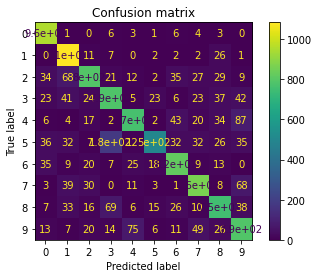

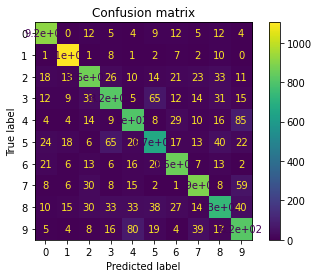

In [ ]:
# CONFUSION MATRIX FOR A GOOD AND A BAD CLASSIFIER
bad_model_rfc = RandomForestClassifier(n_estimators=2, max_depth=10)
good_model_rfc = RandomForestClassifier(n_estimators=10, max_depth=5)
GoodBadModel(bad_model_rfc, good_model_rfc)

Random forest gets a lot more errors than other classifiers when undertrained due to the fact that it starts from taking random variables for prediction.

---

Now, we are going to try those models with Fashion MNIST to see if they react to this dataset as good as it did for MNIST.


In [ ]:
import tensorflow as tf
from keras.datasets import fashion_mnist

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# Reshaping as vectors
trainX = trainX.reshape(-1, 784)
testX = testX.reshape(-1, 784)  
# Getting the labels
set_res = set(testy) 
labels = (list(set_res))

print("\nDecision tree classifier with maximum depth of 10:")
dtc_model(10)
print("AdaBoost classifier with maximum depth of 5 and 10 estimators:")
abc_model(5,10)
print("Bagging classifier with maximum depth of 10 and 5 estimators:")
bc_model(10,5)
print("Random forest classifier with maximum depth of 10 and 5 max trees:")
rfc_model(10,5)


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)

Decision tree classifier with maximum depth of 10:
Training accuracy:  0.8514666666666667
Testing accuracy:  0.8009
Training time: 21.83879041671753s
Inference time: 0.016521215438842773s 


AdaBoost classifier with maximum depth of 5 and 10 estimators:
Training accuracy:  0.6252666666666666
Testing accuracy:  0.6155
Training time: 117.22596168518066s
Inference time: 0.19062185287475586s 


Bagging classifier with maximum depth of 10 and 5 estimators:
Training accuracy:  0.86455
Testing accuracy:  0.8228
Training time: 68.5426778793335s
Inference time: 0.11594915390014648s 


Random forest classifier with maximum depth of 10 and 5 max trees:
Training accuracy:  0.8637666666666667
Testing accuracy:  0.8248
Training time: 2.7927770614624023s
Inference time: 0.029734373092651367s 




Reminder of the previous results to make the comparisons

For DTC / MNIST :

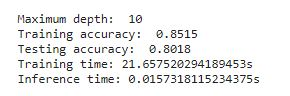

Identical results for the Decision tree classifier for both MNIST and FMNIST.

For ABC / MNIST:

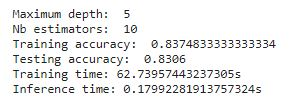

FMNIST performs less with those parameters on AdaBoost Classifier by appromixatively 10%. If we were making a model for FMNIST, it would not be optimal to end on 70% accuracy and we would keep on increasing the parameters for training a little more.


For BC / MNIST:

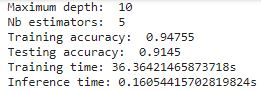

Similarly than for the previous classifier, we get a lower performance by appromixatively 10%. It is still quite good to get 82% accuracy.

For RFC / MNIST:

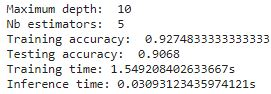

Just like the two previous classifiers, we get a 10% lower accuracy. The score is even the same in Random Forest Classifier as it was with AdaBoost. The big advantage in RFC however is that it took significantly less time for making the same amount of correct predictions (about 25 times quicker for training time and 5 times quicker for inference time)

----
Conclusion :
We are going to take a look at all the classifiers and compare them to get the one that performed the best for MNIST.

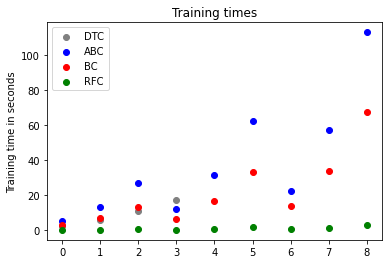

In [ ]:
# Plot for all training times
plt.scatter(range(len(training_time_dtc)),training_time_dtc, color='grey', label="DTC")
plt.scatter(range(len(training_time_abc)),training_time_abc, color='blue', label="ABC")
plt.scatter(range(len(training_time_bc)),training_time_bc, color='red', label="BC")
plt.scatter(range(len(training_time_rfc)),training_time_rfc, color='green', label="RFC")
plt.title('Training times')
plt.ylabel('Training time in seconds')
plt.legend()
plt.show()


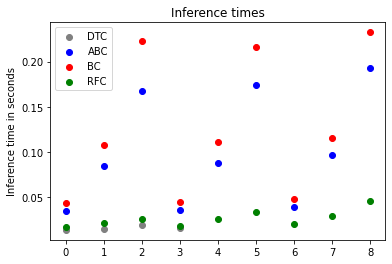

In [ ]:
# Plot for all inference times
plt.scatter(range(len(inference_time_dtc)),inference_time_dtc, color='grey', label="DTC")
plt.scatter(range(len(inference_time_abc)),inference_time_abc, color='blue', label="ABC")
plt.scatter(range(len(inference_time_bc)),inference_time_bc, color='red', label="BC")
plt.scatter(range(len(inference_time_rfc)),inference_time_rfc, color='green', label="RFC")
plt.title('Inference times')
plt.ylabel('Inference time in seconds')
plt.legend()
plt.show()

First let's talk about the first classifier Decision Tree Classifier which is also the simplest one. The processing time is logically relatively low. The accuracy is good but the model goes into overfitting very easily. MNIST is not the most complicated dataset so it's fine to use this classifier but it should be avoided for more complex data.

Second, we can note that AdaBoost Classifier takes a lot more time and is longer than the previous classifier. We can notice there are three groups for the inference time that repeat (approximately 0.04, 0.08 and 0.17s) which are caused directly by the number of estimators respectively 2, 5 and 10. The training times are proportionnally increasing with the number of estimators and the maximum depth makes all times increase in general.

Third, Bagging Classifier gives very similar results as the AdaBoost Classifier. The shape in which trainig and inference time increases is the same, but the difference is that the training time is slightly smaller than the AdaBoost Classifier and slightly higher for the inference time than AdaBoost Classifier. This diffence can be seen even more with the increase in number of estimators.

Lastly, it is a little bit surprising that the random forest classifier has the lowest processing time since it's usually famous for taking a long time. It gets the highest score of accuracy (90%). In terms of ratio time/accuracy, Random Forest Classifier is definitely the best choice for MNIST.

**Bonus question** : what is the difference between a bagging classifier and a random forest classifier ?
In Bagging classifier, all of the data's features are considered to take as random to create the splits of the decision tree. In Random Forest, only a subset of the data is taken at random to create the splits.



